# Image Compression using SVD with Scikit-Learn

This notebook demonstrates image compression via Singular Value Decomposition (SVD) on a sample grayscale image.

## 1. Introduction
We will apply SVD to a grayscale image and reconstruct it using a reduced number of singular values.

## 2. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

## 3. Load and Prepare Image

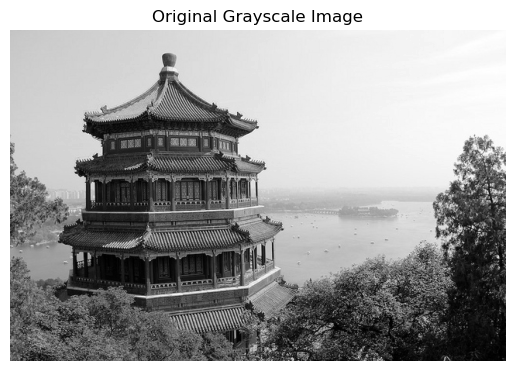

In [3]:
# Load sample image (china) and convert to grayscale
img = load_sample_image('china.jpg')
gray = np.dot(img[..., :3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Flatten for SVD: shape (pixels, 1)
X = gray

## 4. Apply SVD and Reconstruct

In [4]:
def svd_compress(image, k):
    # Compute SVD
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    # Reconstruct with k components
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# Compress with different k values
ks = [5, 20, 50]
compressed = {k: svd_compress(gray, k) for k in ks}

## 5. Visualization of Compressed Images

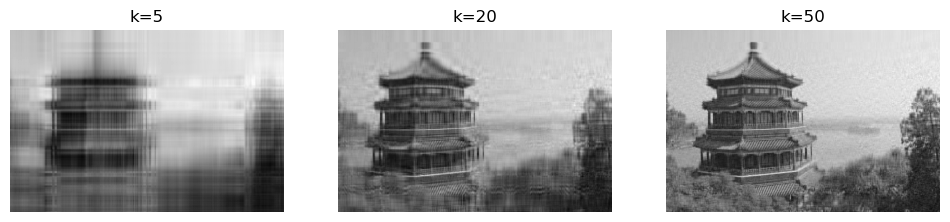

In [5]:
plt.figure(figsize=(12, 4))
for i, k in enumerate(ks, 1):
    plt.subplot(1, len(ks), i)
    plt.imshow(compressed[k], cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')
plt.show()

## 6. Conclusion
SVD-based compression effectively reduces image size while preserving structure. Choose k based on desired quality vs. compression tradeoff.